# COMP2002 Jupyter Notebook Template
Jupyter Notebook for the 70% Coursework for COMP2002.

Task 1.1 - Data Preparation

In [2]:
#Add all imports here
from sklearn.model_selection import cross_val_score
import pandas
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

In [8]:
#Data preparation
columnNames = ["X1","X2","X3","X4","X5","X6","X7","X8","Y1","Y2"]
data = pandas.read_excel("COMP2002Data.xlsx", names = columnNames)
values = data.values
inputs = values[:,:8].astype(float)
targets = values[:,8:].astype(float)
scaler = MinMaxScaler()
scaled = scaler.fit_transform(inputs)
X_train, X_test, Y_train, Y_test = train_test_split(scaled, targets)

Task 1.2 - Regression

Random Forest

In [9]:
#RandomForestGenerator regressor code

regressorRandomForest = RandomForestRegressor(max_depth=20)
regressorRandomForest.fit(X_train, Y_train)
Y_pred = regressorRandomForest.predict(X_test)

#End of RandomForestGenerator regressor code

In [10]:
#NeuralNetwork regressor code

regressorMLP = MLPRegressor(max_iter=16000)
regressorMLP.fit(X_train, Y_train)
Y_pred = regressorMLP.predict(X_test)

#End of NeuralNetwork regressor code

In [11]:
#SVR Regressor Code

regressorSVR = SVR(max_iter=10000)
regressorSVR2 = SVR(max_iter=10000)
regressorSVR.fit(X_train,Y_train[:,0])
regressorSVR2.fit(X_train,Y_train[:,1])
Y_pred = regressorSVR.predict(X_test)
X_pred = regressorSVR2.predict(X_test)

#End of SVR Regressor code

Task 1.3 - Cross Validation

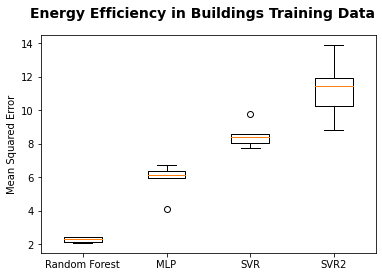

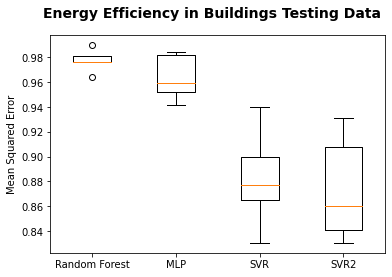

In [12]:
#Cross validation for each of the training scores
scoresRandomForest = cross_val_score(regressorRandomForest, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
scoresMLP = cross_val_score(regressorMLP, X_train, Y_train, cv=5, scoring='neg_mean_squared_error')
scoresSVR = cross_val_score(regressorSVR, X_train, Y_train[:,0], cv=5, scoring='neg_mean_squared_error')
scoresSVR2 = cross_val_score(regressorSVR2, X_train, Y_train[:,1], cv=5, scoring='neg_mean_squared_error')
#Making all the training validation positive
scoresRandomForest = np.abs(scoresRandomForest)
scoresMLP = np.abs(scoresMLP)
scoresSVR = np.abs(scoresSVR)
scoresSVR2 = np.abs(scoresSVR2)
#Cross validation for each of the testing scores
test_scoresRandomForest = cross_val_score(regressorRandomForest, X_test, Y_test, cv=5)
test_scoresMLP = cross_val_score(regressorMLP, X_test, Y_test, cv=5)
test_scoresSVR = cross_val_score(regressorSVR, X_test, Y_test[:,0], cv=5)
test_scoresSVR2 = cross_val_score(regressorSVR2, X_test, Y_test[:,1], cv=5)

#Making all the testing validation positive
test_scoresRandomForest = np.abs(test_scoresRandomForest)
test_scoresMLP = np.abs(test_scoresMLP)
test_scoresSVR = np.abs(test_scoresSVR)
test_scoresSVR2 = np.abs(test_scoresSVR2)

###Plotting the training validation data onto a boxplot

plt.boxplot([scoresRandomForest, scoresMLP, scoresSVR, scoresSVR2])
plt.suptitle('Energy Efficiency in Buildings Training Data', fontsize=14, fontweight='bold')
plt.ylabel('Mean Squared Error')
plt.xticks([1,2,3,4], ['Random Forest', 'MLP', 'SVR', 'SVR2'])
plt.show()

###Plotting the testing validation data onto a boxplot
plt.boxplot([test_scoresRandomForest, test_scoresMLP, test_scoresSVR, test_scoresSVR2])
plt.suptitle('Energy Efficiency in Buildings Testing Data', fontsize=14, fontweight='bold')
plt.ylabel('Mean Squared Error')
plt.xticks([1,2,3,4], ['Random Forest', 'MLP', 'SVR', 'SVR2'])
plt.show()

# Task 2: Optimisation

In [17]:
#Read in the data from the txt file
data = pandas.read_csv("Modules.txt", sep = "|", header = None)

#Set the concurrence restraints of the modules
concurrenceRestraints = data.iloc[:,3:4]
print (concurrenceRestraints)


                                                    3
0   MOD002,MOD003,MOD004,MOD005,MOD006,MOD007,MOD0...
1   MOD001,MOD003,MOD004,MOD005,MOD006,MOD007,MOD0...
2   MOD001,MOD002,MOD004,MOD005,MOD006,MOD007,MOD0...
3   MOD001,MOD002,MOD003,MOD005,MOD006,MOD007,MOD0...
4   MOD001,MOD002,MOD003,MOD004,MOD006,MOD007,MOD0...
5   MOD001,MOD002,MOD003,MOD004,MOD005,MOD007,MOD0...
6   MOD001,MOD002,MOD003,MOD004,MOD005,MOD006,MOD0...
7   MOD001,MOD002,MOD003,MOD004,MOD005,MOD006,MOD0...
8   MOD001,MOD002,MOD003,MOD004,MOD005,MOD006,MOD0...
9   MOD001,MOD002,MOD003,MOD004,MOD005,M0D006,MOD0...
10  MOD003,MOD004,MOD005,MOD006,MOD007,MOD008,MOD0...
11  MOD003,MOD04,MOD005,MOD006,MOD007,MOD008,MOD00...
12          MOD001,MOD002,MOD003,MOD004,MOD009,MOD010
13   MOD007,MOD008,M0D011,MOD012,MOD015,MOD016,MOD017
14   MOD007,MOD008,MOD011,MOD012,MOD014,MOD016,MOD017
15   MOD007,MOD008,MOD011,MOD012,MOD014,MOD015,MOD017
16   MOD007,MOD008,MOD011,MOD012,MOD014,MOD015,MOD016
